<a href="https://colab.research.google.com/github/b10cay0/iA/blob/main/Proyecto_final_bueno_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# librería básica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Scaler, train test split y grid search cv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# clasificadores a probar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# PCA
from sklearn.decomposition import PCA

# Scores
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

# Matriz de confusión
from sklearn.metrics import confusion_matrix

# importamos make_scorer para crear callable de matthews
from sklearn.metrics import make_scorer

In [2]:
# creamos función para plotear matriz de confusión
def plot_mc(mc):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    labels=["Benigno","Maligno"]
    sb.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Matriz de confusión")
 
    sb.set(font_scale=1.4)
    ax = sb.heatmap(mc, annot=True, cmap="Blues", cbar_kws={'label': 'Escala'},fmt='g')
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="Valor verdadero", xlabel="Valor predecido")

In [4]:
# Importamos DB
df=pd.read_csv("breast-cancer.csv", sep=',')
# verificamos que no tenga NaN
nans=df.isnull().sum()
print(nans)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# Pasamos valores categóricos a numéricos
df['diagnosis'] = df['diagnosis'].replace(['B'], 0)
df['diagnosis'] = df['diagnosis'].replace(['M'], 1)

In [6]:
# eliminamos la columna id porque no es relevante para este proyecto
df.drop('id',inplace=True,axis=1)

In [7]:
# movemos la columna de etiquetas (diagnosis) hasta el final
Y=df.pop('diagnosis')
df['diagnosis']=Y
print(df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [8]:
# Dividimos el df en arrays X y Y
y=Y.values
X=df.drop('diagnosis',axis=1).values
print(y)
print(X)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [9]:
# Creamos conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Realizamos PCA
pca=PCA()
pca.fit(X)
pca_datos=pca.transform(X)
print(pca.explained_variance_ratio_)

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


In [12]:
print(sum(pca.explained_variance_ratio_[0:5]))

0.9999878765363126


De acuerdo con los resultados de PCA, nos quedaremos con las primeras 6 características para quedarnos con el 99.99% de la varianza explicada.

In [13]:
# PCA al conjunto de entrenamiento
pca_train=PCA(n_components=6)
pca_train.fit(X_train)
print(sum(pca_train.explained_variance_ratio_))

0.8888757957592269


In [14]:
# PCA al conjunto de test
pca_test=PCA(n_components=6)
pca_test.fit(X_test)
print(sum(pca_test.explained_variance_ratio_))

0.8982431898831016


In [15]:
# Creamos callable de mcc para usarlo para el refit del GridSearch
mcc=make_scorer(matthews_corrcoef)
scoring={
    'ROC_AUC':'roc_auc',
    'f1_score':'f1',
    'MCC':mcc}

# GridSearch para KNN
knn_params={
    'n_neighbors':[1,10,20],
    'weights':('uniform','distance'),
    'algorithm':('ball_tree','kd_tree','brute'),
    'p':[1,2]
}
knn=KNeighborsClassifier()
clf_knn = GridSearchCV(knn, knn_params,scoring=scoring,refit='MCC')

In [16]:
# entrenamos
clf_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 10, 20], 'p': [1, 2],
                         'weights': ('uniform', 'distance')},
             refit='MCC',
             scoring={'MCC': make_scorer(matthews_corrcoef),
                      'ROC_AUC': 'roc_auc', 'f1_score': 'f1'})

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
MCC en train:  0.9204824603505196
F1 en train:  1.0
AUC-ROC en train:  1.0


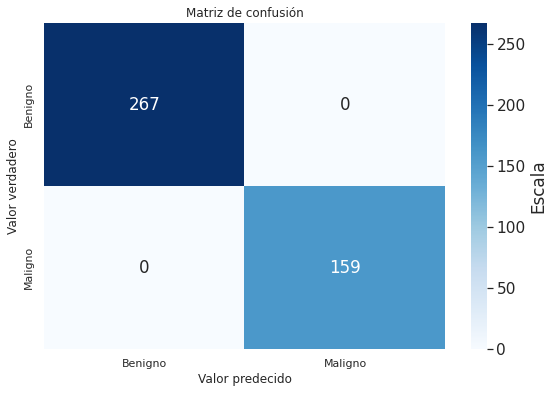

In [17]:
# Buscamos los mejores parametros
print(clf_knn.best_params_)
print('MCC en train: ',clf_knn.best_score_)
print('F1 en train: ',f1_score(y_train,clf_knn.predict(X_train)))
print('AUC-ROC en train: ',roc_auc_score(y_train,clf_knn.predict(X_train)))
# Matriz de confusión de entrenamiento
mc_knn=confusion_matrix(y_train,clf_knn.predict(X_train))
plot_mc(mc_knn)

MCC en test:  0.8947661532504989
F1 en test:  0.9333333333333333
AUC-ROC en test:  0.9455974842767296


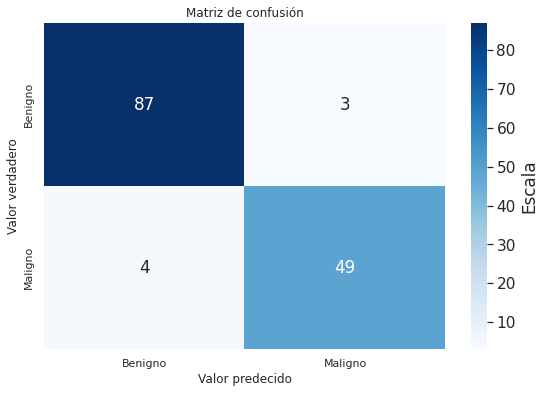

In [18]:
# predecimos X_test
knn_ypred=clf_knn.predict(X_test)
# Medimos scores
print('MCC en test: ',matthews_corrcoef(y_test,knn_ypred))
print('F1 en test: ',f1_score(y_test,knn_ypred))
print('AUC-ROC en test: ',roc_auc_score(y_test,knn_ypred))
# Matriz de confusión de test
mc_knn1=confusion_matrix(y_test,knn_ypred)
plot_mc(mc_knn1)

In [19]:
# Gridsearch para RandomForest
rf_params={
    'n_estimators':[50,100,200],
    'criterion':('gini','entropy','log_loss'),
    'max_depth':[None,1,10,20],
}
rf=RandomForestClassifier()
clf_rf = GridSearchCV(rf, rf_params,scoring=scoring,refit='MCC')

In [20]:
# entrenamos
clf_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [None, 1, 10, 20],
                         'n_estimators': [50, 100, 200]},
             refit='MCC',
             scoring={'MCC': make_scorer(matthews_corrcoef),
                      'ROC_AUC': 'roc_auc', 'f1_score': 'f1'})

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}
MCC en train:  0.9096075725838182
F1 en train:  1.0
AUC-ROC en train:  1.0


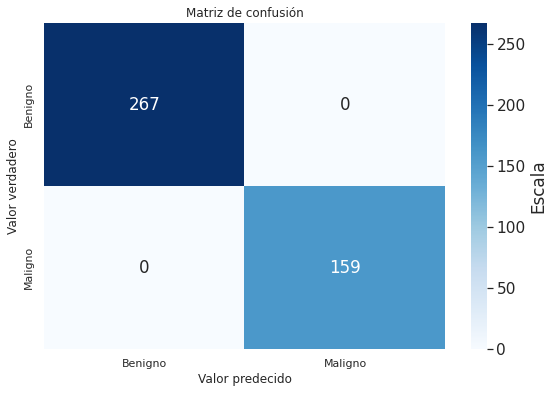

In [21]:
# Buscamos los mejores parametros
print(clf_rf.best_params_)
print('MCC en train: ',clf_rf.best_score_)
print('F1 en train: ',f1_score(y_train,clf_rf.predict(X_train)))
print('AUC-ROC en train: ',roc_auc_score(y_train,clf_rf.predict(X_train)))
# Matriz de confusión de train
mc_rf=confusion_matrix(y_train,clf_rf.predict(X_train))
plot_mc(mc_rf)

MCC en test:  0.940041928721174
F1 en test:  0.9622641509433962
AUC-ROC en test:  0.9700209643605869


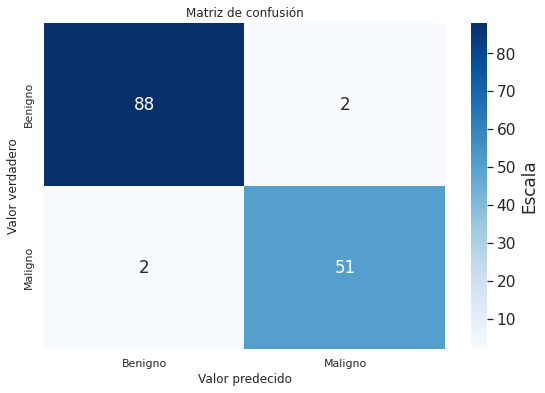

In [22]:
# predecimos X_test
rf_ypred=clf_rf.predict(X_test)
# Medimos scores
print('MCC en test: ',matthews_corrcoef(y_test,rf_ypred))
print('F1 en test: ',f1_score(y_test,rf_ypred))
print('AUC-ROC en test: ',roc_auc_score(y_test,rf_ypred))
# Matriz de confusión de test
mc_rf1=confusion_matrix(y_test,rf_ypred)
plot_mc(mc_rf1)

In [23]:
# Gridsearch para MLPC
ann_params={
    'hidden_layer_sizes':[(100,3),(100,4),(100,5),(100,6)],
    'activation':('identity', 'logistic', 'tanh', 'relu'),
    'learning_rate':('constant','invscaling','adaptative'),
    'max_iter':[500]
}
ann=MLPClassifier()
clf_ann = GridSearchCV(ann, ann_params,scoring=scoring,refit='MCC')

In [24]:
# entrenamos
clf_ann.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'hidden_layer_sizes': [(100, 3), (100, 4), (100, 5),
                                                (100, 6)],
                         'learning_rate': ('constant', 'invscaling',
                                           'adaptative'),
                         'max_iter': [500]},
             refit='MCC',
             scoring={'MCC': make_scorer(matthews_corrcoef),
                      'ROC_AUC': 'roc_auc', 'f1_score': 'f1'})

{'activation': 'logistic', 'hidden_layer_sizes': (100, 5), 'learning_rate': 'invscaling', 'max_iter': 500}
MCC en train:  0.9650780919546056
F1 en train:  0.9872611464968153
AUC-ROC en train:  0.9874213836477987


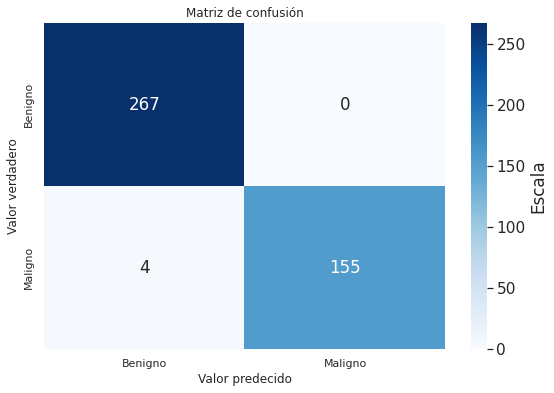

In [25]:
# Buscamos los mejores parametros
print(clf_ann.best_params_)
print('MCC en train: ',clf_ann.best_score_)
print('F1 en train: ',f1_score(y_train,clf_ann.predict(X_train)))
print('AUC-ROC en train: ',roc_auc_score(y_train,clf_ann.predict(X_train)))
# Matriz de confusión de train
mc_ann=confusion_matrix(y_train,clf_ann.predict(X_train))
plot_mc(mc_ann)

MCC en test:  0.9097751526641134
F1 en test:  0.9423076923076923
AUC-ROC en test:  0.9511530398322852


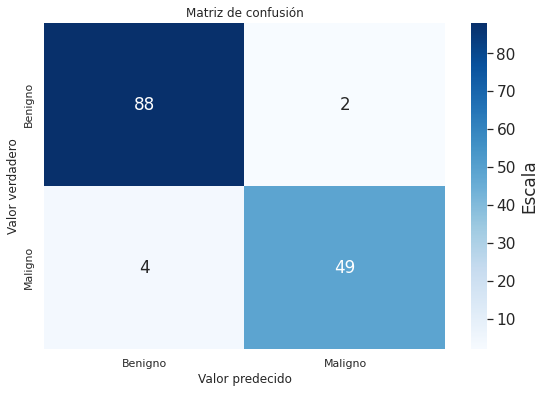

In [26]:
# predecimos X_test
ann_ypred=clf_ann.predict(X_test)
# Medimos scores
print('MCC en test: ',matthews_corrcoef(y_test,ann_ypred))
print('F1 en test: ',f1_score(y_test,ann_ypred))
print('AUC-ROC en test: ',roc_auc_score(y_test,ann_ypred))
# Matriz de confusión de test
mc_ann1=confusion_matrix(y_test,ann_ypred)
plot_mc(mc_ann1)

In [27]:
# Gridsearch para svm
svm_params={
    'C':[0.1,1,2],
    'kernel':('linear','poly','rbf','sigmoid'),
    'degree':[3,6,9],
    'gamma':('scale','auto'),
    'coef0':[0,0.1,1]
}
svm=SVC()
clf_svm = GridSearchCV(svm, svm_params,scoring=scoring,refit='MCC')

In [28]:
# entrenamos
clf_svm.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 2], 'coef0': [0, 0.1, 1],
                         'degree': [3, 6, 9], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             refit='MCC',
             scoring={'MCC': make_scorer(matthews_corrcoef),
                      'ROC_AUC': 'roc_auc', 'f1_score': 'f1'})

{'C': 1, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
MCC en train:  0.9650175313317512
F1 en train:  0.9810126582278481
AUC-ROC en train:  0.9836760652957388


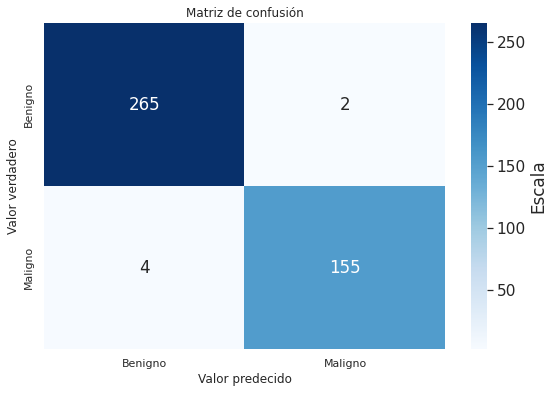

In [29]:
# Buscamos los mejores parametros
print(clf_svm.best_params_)
print('MCC en train: ',clf_svm.best_score_)
print('F1 en train: ',f1_score(y_train,clf_svm.predict(X_train)))
print('AUC-ROC en train: ',roc_auc_score(y_train,clf_svm.predict(X_train)))
# Matriz de confusión de train
mc_svm=confusion_matrix(y_train,clf_svm.predict(X_train))
plot_mc(mc_svm)

MCC en test:  0.940041928721174
F1 en test:  0.9622641509433962
AUC-ROC en test:  0.9700209643605869


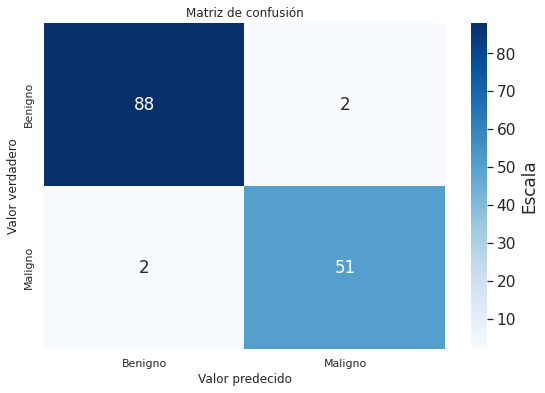

In [30]:
# predecimos X_test
svm_ypred=clf_svm.predict(X_test)
# Medimos scores
print('MCC en test: ',matthews_corrcoef(y_test,svm_ypred))
print('F1 en test: ',f1_score(y_test,svm_ypred))
print('AUC-ROC en test: ',roc_auc_score(y_test,svm_ypred))
# Matriz de confusión de test
mc_svm1=confusion_matrix(y_test,svm_ypred)
plot_mc(mc_svm1)

MCC en train:  0.8893461466564496
F1 en train:  0.9285714285714286
AUC-ROC en train:  0.9384495795350152


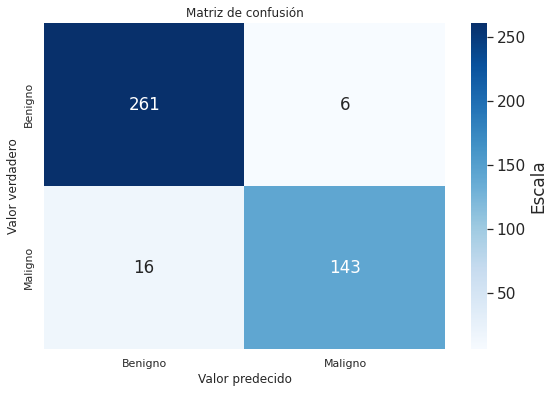

In [31]:
# Gridsearch para gnb
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))
print('F1 en train: ',f1_score(y_train,clf_gnb.predict(X_train)))
print('AUC-ROC en train: ',roc_auc_score(y_train,clf_gnb.predict(X_train)))
# Matriz de confusión de train
mc_gnb=confusion_matrix(y_train,clf_gnb.predict(X_train))
plot_mc(mc_gnb)

MCC en test:  0.820125786163522
F1 en test:  0.8867924528301887
AUC-ROC en test:  0.910062893081761


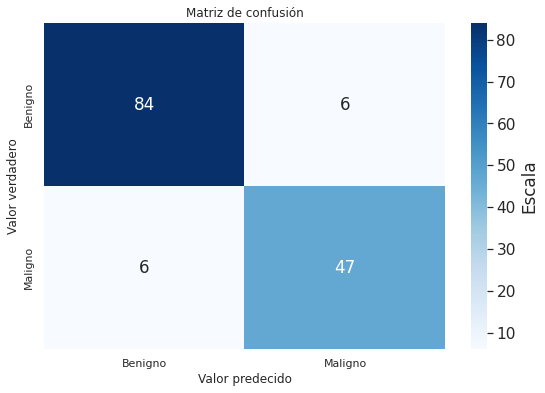

In [32]:
# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))
print('F1 en test: ',f1_score(y_test,gnb_ypred))
print('AUC-ROC en test: ',roc_auc_score(y_test,gnb_ypred))
# Matriz de confusión de test
mc_gnb1=confusion_matrix(y_test,gnb_ypred)
plot_mc(mc_gnb1)

In [33]:
# Gridsearch para regresión logística
rl_params={
    'penalty':('l1','l2','elasticnet','none'),
    'dual':[True,False],
    'C':[0.1,1,2],
    'class_weight':('balanced',None),
    'solver':('newton-cg','lbfgs','liblinear','sag','saga')
}
rl=LogisticRegression()
clf_rl = GridSearchCV(rl, rl_params,scoring=scoring,refit='MCC')

In [34]:
# entrenamos
clf_rl.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penal

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 2], 'class_weight': ('balanced', None),
                         'dual': [True, False],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             refit='MCC',
             scoring={'MCC': make_scorer(matthews_corrcoef),
                      'ROC_AUC': 'roc_auc', 'f1_score': 'f1'})

{'C': 0.1, 'class_weight': None, 'dual': False, 'penalty': 'none', 'solver': 'sag'}
MCC en train:  0.969963805608753
F1 en train:  0.9872611464968153
AUC-ROC en train:  0.9874213836477987


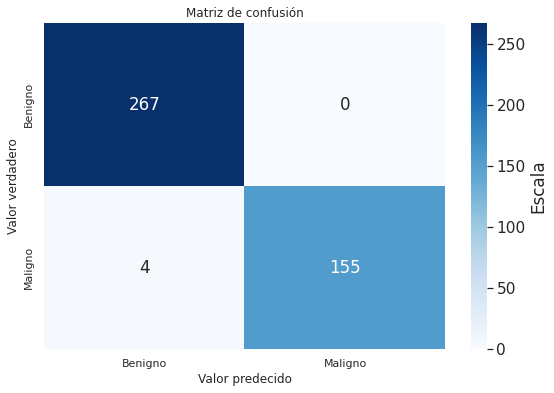

In [35]:
# Buscamos los mejores parametros
print(clf_rl.best_params_)
print('MCC en train: ',clf_rl.best_score_)
print('F1 en train: ',f1_score(y_train,clf_rl.predict(X_train)))
print('AUC-ROC en train: ',roc_auc_score(y_train,clf_rl.predict(X_train)))
# Matriz de confusión de train
mc_rl=confusion_matrix(y_train,clf_rl.predict(X_train))
plot_mc(mc_rl)

MCC en test:  0.8955785926563062
F1 en test:  0.9345794392523364
AUC-ROC en test:  0.949475890985325


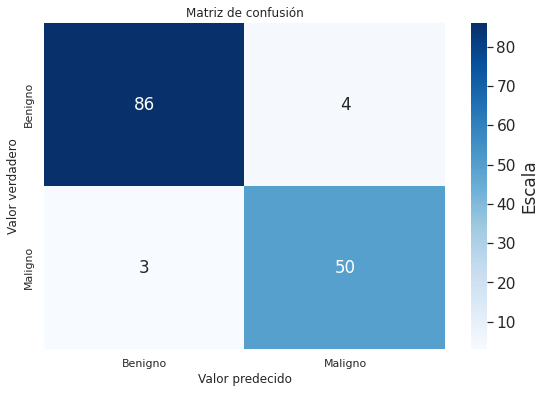

In [36]:
# predecimos X_test
rl_ypred=clf_rl.predict(X_test)
# Medimos MCC
print('MCC en test: ',matthews_corrcoef(y_test,rl_ypred))
print('F1 en test: ',f1_score(y_test,rl_ypred))
print('AUC-ROC en test: ',roc_auc_score(y_test,rl_ypred))
# Matriz de confusión de test
mc_rl1=confusion_matrix(y_test,rl_ypred)
plot_mc(mc_rl1)